<a href="https://colab.research.google.com/github/oluseyedev/oluseyedev/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [13]:
pip install pandas scikit-learn

In [47]:
!pip install matplotlib-venn
from sklearn.impute import SimpleImputer
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
!pip install pyexcel pyexcel-ods pyexcel-ods3 pyexcel-odsr pyexcel-io

In [22]:
import pyexcel as pe


In [23]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
# Create a Spark session
spark = SparkSession.builder.appName('crime_analysis').getOrCreate()

In [25]:

pe.get_book(file_name="/content/offence/prc-pfa-mar2013-onwards-tables.ods").save_as("/content/offence/crime_rec.csv")


In [31]:
# Read the CSV files into Spark dataframes

df_2014_15 = spark.read.csv("/content/offence/crime_rec__2014-15__0.csv")
df_2015_16 = spark.read.csv("/content/offence/crime_rec__2015-16__1.csv")
df_2016_17 = spark.read.csv("/content/offence/crime_rec__2016-17__2.csv")
df_2017_18 = spark.read.csv("/content/offence/crime_rec__2017-18__3.csv")
df_2018_19 = spark.read.csv("/content/offence/crime_rec__2018-19__4.csv")
df_2019_20 = spark.read.csv("/content/offence/crime_rec__2019-20__5.csv")
df_2020_21 = spark.read.csv("/content/offence/crime_rec__2020-21__6.csv")
df_2021_22 = spark.read.csv("/content/offence/crime_rec__2021-22__7.csv")
df_2022_23 = spark.read.csv("/content/offence/crime_rec__2022-23__8.csv")
df_2023_24 = spark.read.csv("/content/offence/crime_rec__2023-24__9.csv")

In [32]:
# Merge the dataframes into one dataframe
df = df_2014_15.union(df_2015_16).union(df_2016_17).union(df_2017_18).union(df_2018_19).union(df_2019_20).union(df_2020_21).union(df_2021_22).union(df_2022_23).union(df_2023_24)

In [33]:
df.head()

Row(_c0='Financial Year', _c1='Financial Quarter', _c2='Force Name', _c3='Offence Description', _c4='Offence Group', _c5='Offence Subgroup', _c6='Offence Code', _c7='Number of Offences')

In [34]:
# Rename the columns
df = df.withColumnRenamed('_c0', 'financial_year').withColumnRenamed('_c1', 'financial_quarter').withColumnRenamed('_c2', 'force_name').withColumnRenamed('_c3', 'offence_des').withColumnRenamed('_c4', 'offence_grp').withColumnRenamed('_c5', 'offence_sub').withColumnRenamed('_c6', 'offence_code').withColumnRenamed('_c7', 'number_of_offence')

In [35]:
df.head()

Row(financial_year='Financial Year', financial_quarter='Financial Quarter', force_name='Force Name', offence_des='Offence Description', offence_grp='Offence Group', offence_sub='Offence Subgroup', offence_code='Offence Code', number_of_offence='Number of Offences')

In [37]:
# Convert the dataframe to a pandas dataframe
crime_pdf = df.toPandas()

In [39]:
# Save the pandas dataframe as a CSV file
crime_pdf.to_csv('crime_data.csv', index=False)

In [41]:
# Show the first five rows of the dataframe
crime_pdf.head()

,financial_year,financial_quarter,force_name,offence_des,offence_grp,offence_sub,offence_code,number_of_offence
0,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
1,2014/15,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,3
2,2014/15,1,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,3
3,2014/15,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3
4,2014/15,1,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,3


In [44]:
print(df.head())


Row(financial_year='Financial Year', financial_quarter='Financial Quarter', force_name='Force Name', offence_des='Offence Description', offence_grp='Offence Group', offence_sub='Offence Subgroup', offence_code='Offence Code', number_of_offence='Number of Offences')


In [49]:
# Check the number of missing values in each column
from pyspark.sql.functions import count, when, isnull

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+
|financial_year|financial_quarter|force_name|offence_des|offence_grp|offence_sub|offence_code|number_of_offence|
+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+
|           165|              165|       165|        165|        165|        165|         165|              165|
+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+



In [50]:
# Drop any rows that have missing values in the force_name column
df = df.dropna(subset=['force_name'])

In [51]:
# Fill any missing values in the number_of_offence column with 0
df = df.fillna(0, subset=['number_of_offence'])

In [52]:
# Replace any invalid values in the offence_group column with 'Other'
df = df.replace(['Total recorded crime', 'Total recorded crime excluding fraud'], 'Other', subset=['offence_grp'])

In [54]:
# Cast the number_of_offences column to integer type
df = df.withColumn('number_of_offence', df.number_of_offence.cast('int'))

In [61]:
# Create a boolean column that indicates whether a value is null or not
df = df.withColumn('is_null', isnull(df.offence_grp))

In [62]:
# Show the rows that have null values in the offence column
df.filter(df.is_null).show()

+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+-------+
|financial_year|financial_quarter|force_name|offence_des|offence_grp|offence_sub|offence_code|number_of_offence|is_null|
+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+-------+
+--------------+-----------------+----------+-----------+-----------+-----------+------------+-----------------+-------+



In [68]:
crime_pdf.head()

,financial_year,financial_quarter,force_name,offence_des,offence_grp,offence_sub,offence_code,number_of_offence
0,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
1,2014/15,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,3
2,2014/15,1,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,3
3,2014/15,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3
4,2014/15,1,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,3


In [ ]:
df.describe()    # To get summary statistics for numerical columns
df.columns       # To get the column names

Index(['Year', 'Force_Name', 'Offence_Description', 'Offence_Group',
       'Offence_Subgroup', 'Number_of_Offences'],
      dtype='object')

In [65]:
df.drop_duplicates()     # Remove duplicate rows
df.dtypes               # Check data types of columns

[('financial_year', 'string'),
 ('financial_quarter', 'string'),
 ('force_name', 'string'),
 ('offence_des', 'string'),
 ('offence_grp', 'string'),
 ('offence_sub', 'string'),
 ('offence_code', 'string'),
 ('number_of_offence', 'int'),
 ('is_null', 'boolean')]

In [71]:
# Create a new dataframe that has only distinct rows
df_distinct = df.dropDuplicates()

In [72]:
# Compare the number of rows in the original dataframe and the distinct dataframe
print('Number of rows in the original dataframe:', df.count())
print('Number of rows in the distinct dataframe:', df_distinct.count())

Number of rows in the original dataframe: 211019
Number of rows in the distinct dataframe: 211010


In [74]:
# Get the summary statistics of the number_of_offences column
df.describe('number_of_offence').show()

+-------+------------------+
|summary| number_of_offence|
+-------+------------------+
|  count|            211009|
|   mean|243.73703491320276|
| stddev|1826.6909241658861|
|    min|               -58|
|    max|            132693|
+-------+------------------+



In [75]:
# Import the libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Convert the dataframe to a pandas dataframe
crime_pdf = df.toPandas()

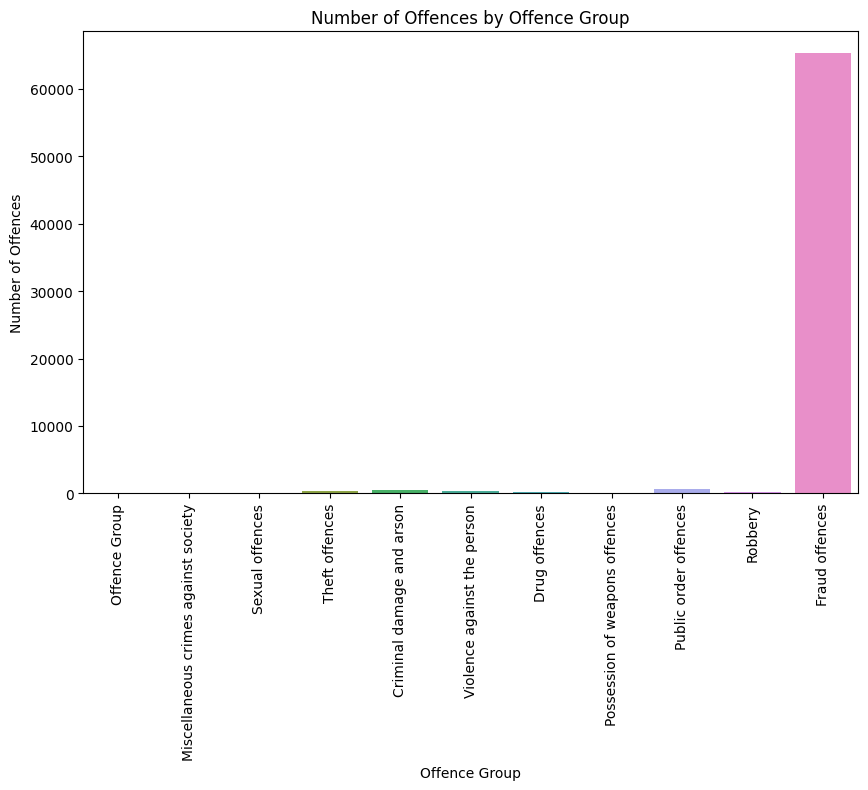

In [81]:
# Create a bar chart to show the number of offences by offence group
plt.figure(figsize=(10,6))
sns.barplot(x='offence_grp', y='number_of_offence', data=crime_pdf, errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Offence Group')
plt.ylabel('Number of Offences')
plt.title('Number of Offences by Offence Group')
plt.show()

In [198]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.17.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [201]:
import pandas as pd
print(pd.__version__)

1.5.3


In [202]:
print(crime_pdf.head())

Row(financial_year='Financial Year', financial_quarter='Financial Quarter', force_name='Force Name', offence_des='Offence Description', offence_grp='Offence Group', offence_sub='Offence Subgroup', offence_code='Offence Code', number_of_offence=None, is_null=False, year='Fina', is_violent=0)


In [86]:
# Import the libraries
import seaborn as sns
import numpy as np



In [91]:
crime_pdf = df.toPandas()

In [94]:
# Convert the Spark dataframe column to a pandas series
data = crime_pdf['number_of_offence']



<Axes: xlabel='number_of_offence', ylabel='Density'>

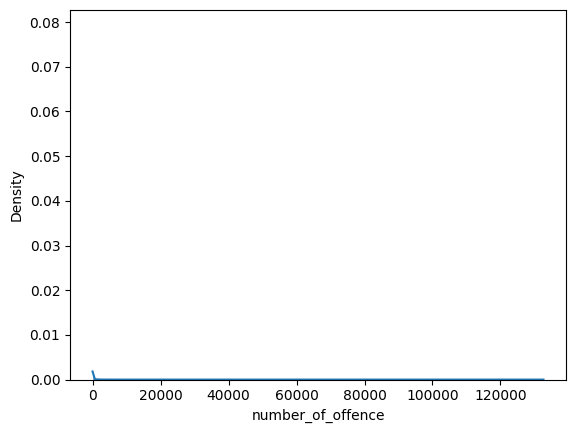

In [96]:
# Create a plot with seaborn
sns.histplot(data, kde=True, stat='density')

In [99]:
crime_pdf = df.toPandas()

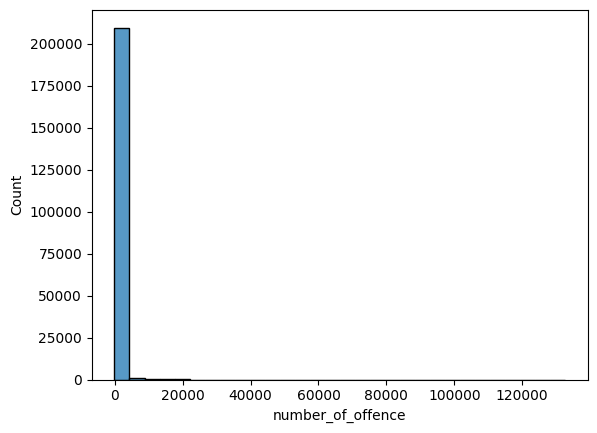

In [100]:
# For Number_of_offences
sns.histplot(crime_pdf['number_of_offence'], bins=30)
plt.show()

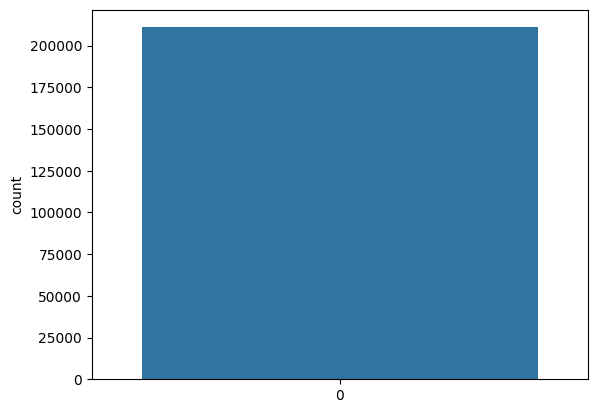

In [106]:
# For categorical variables
sns.countplot(crime_pdf['number_of_offence'])
plt.show()

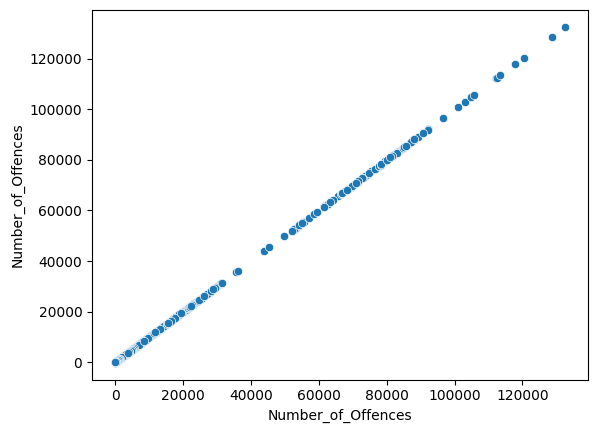

In [ ]:
sns.scatterplot(x='Number_of_Offences', y='Number_of_Offences', data=df)
plt.show()

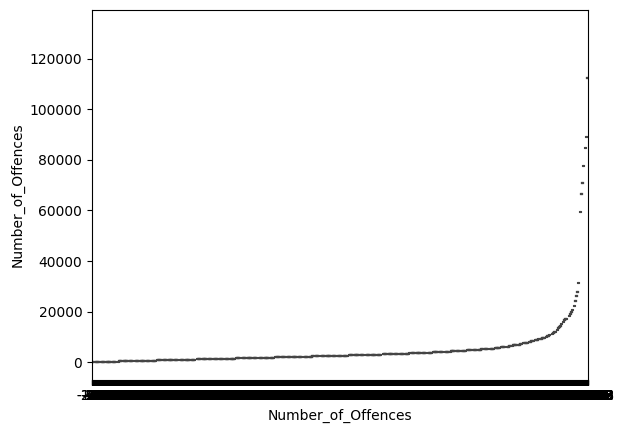

In [ ]:
sns.boxplot(x='Number_of_Offences', y='Number_of_Offences', data=df)
plt.show()

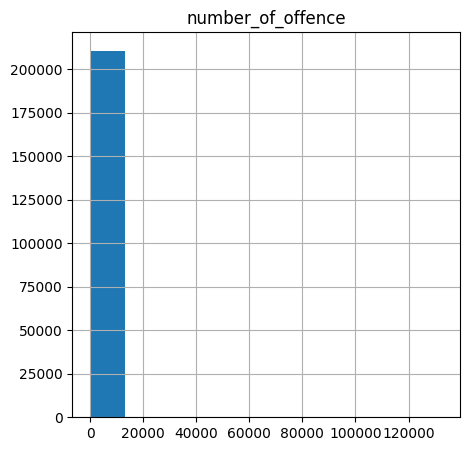

In [124]:
crime_pdf.hist(figsize=(5, 5))
plt.show()

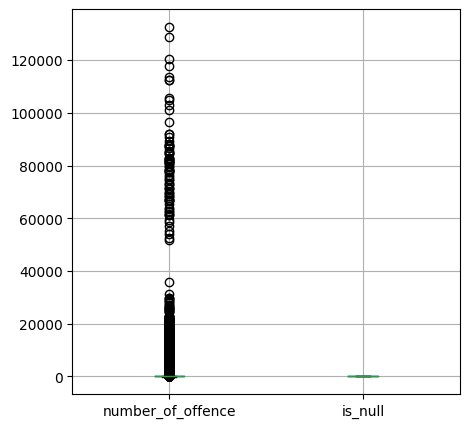

In [125]:
# Plot boxplots for each column
crime_pdf.boxplot(figsize=(5, 5))
plt.show()

In [127]:
import numpy as np

In [126]:
# Define a function to detect outliers using IQR
def detect_outliers(crime_pdf, column):
# Calculate the first and third quartiles
  q1 = np.percentile(crime_pdf[column], 25)
  q3 = np.percentile(crime_pdf[column], 75)
  # Calculate the IQR
  iqr = q3 - q1
  # Define the lower and upper thresholds
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  # Find the index of the outliers
  outliers_index = df[(df[column] < lower) | (df[column] > upper)].index

  # Return the index of the outliers
  return outliers_index

In [130]:
def detect_outliers(data, column):
# Calculate the median and the IQR of the column
  median = data[column].median()
  iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
# Define the lower and upper bounds for outliers
  lower_bound = median - 1.5 * iqr
  upper_bound = median + 1.5 * iqr
# Return the indices of the outliers
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()

In [108]:
# Define a function to classify the offence as violent or not
def is_violent(offence):
  if offence == 'Violence against the person':
    return 1
  else:
    return 0

In [109]:
# Import the module for creating UDFs
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Create a UDF based on the function
is_violent_udf = udf(is_violent, IntegerType())

In [111]:
# Apply the UDF to the offence_group column and create a new column
df = df.withColumn('is_violent', is_violent_udf(df.offence_grp))

In [131]:
from google.colab import files

crime_pdf.to_csv('crime_df.csv')
files.download('crime_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>